#

# Cotação e correlação IBOV X DOL

## 1 - Importando as ferramentas

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns


## 2 - Coletando os dados

In [88]:
papers = ['^BVSP', 'BRL=X']

data  = yf.download(tickers= papers)

wallet = pd.DataFrame(data)

wallet.to_csv('./wallet0.csv')


[*********************100%***********************]  2 of 2 completed


## 3 - Visualizando os dados

In [ ]:
# fig, ax = plt.subplots(figsize=(22,8))
# ax.legend(labels=['^BVSP', 'MM21', 'MM200'])
# plt.show()

wallet['Close'].info()

wallet['Close'].plot(subplots=True, figsize=(22,8))

# df_ibov = wallet.xs(papers[0],level='Ticker', axis=1)
# df_brlusd = wallet.xs(papers[1],level='Ticker', axis=1)


# df_ibov['Close'].plot(figsize=(22,8))
# df_ibov["Close"].rolling(21).mean().plot()
# df_ibov["Close"].rolling(200).mean().plot()




## 4 - Tratando os dados

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4433 entries, 2007-01-02 to 2025-01-14
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DOLFUT           4433 non-null   float64
 1   IBOV             4433 non-null   float64
 2   IBOV_DOLARIZADO  4433 non-null   float64
dtypes: float64(3)
memory usage: 138.5 KB


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

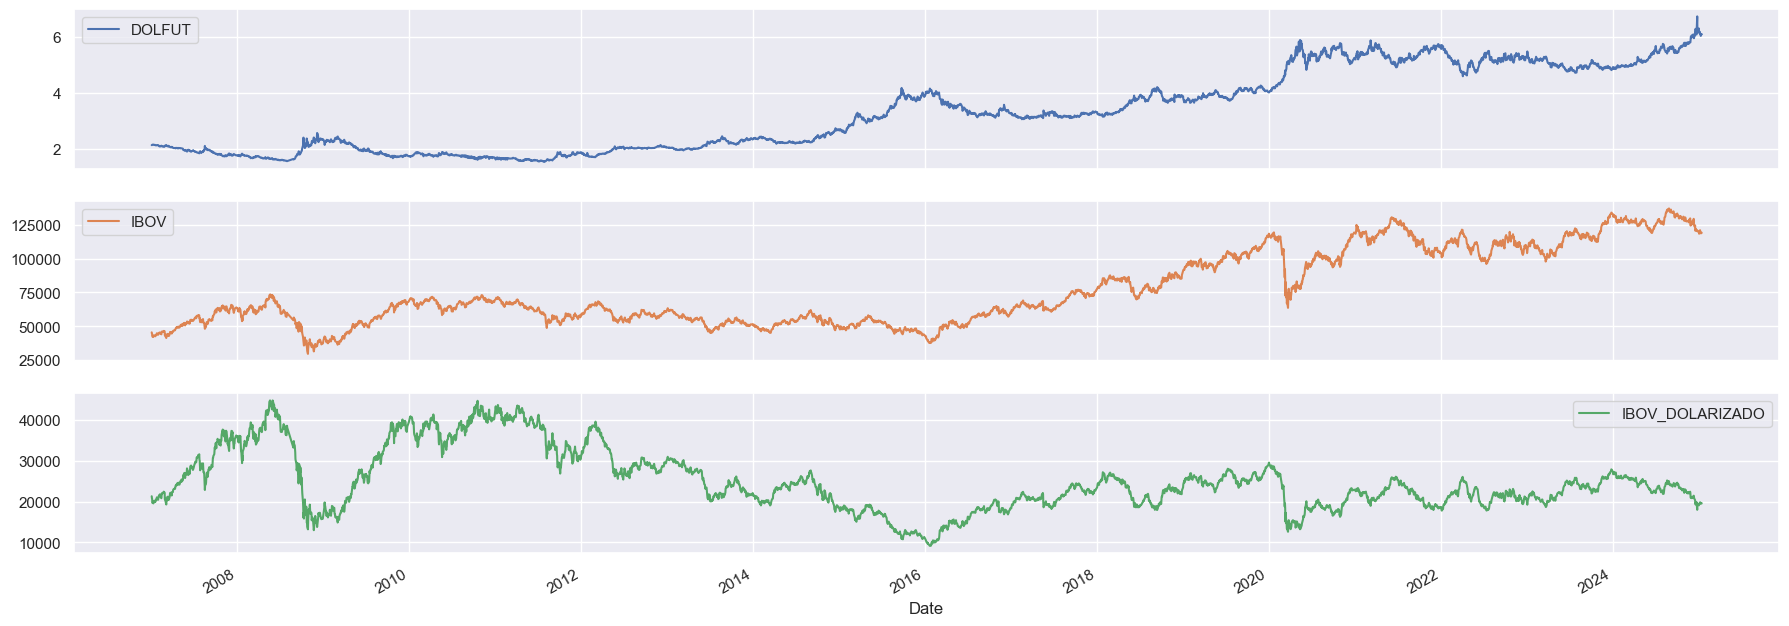

In [108]:
sns.set()

wallet_close_clean = wallet["Close"].query('Date > "2007-01-01"').dropna()

wallet_close_clean.columns = ["DOLFUT", "IBOV"]

wallet_close_clean["IBOV_DOLARIZADO"] = (
    wallet_close_clean["IBOV"] / wallet_close_clean["DOLFUT"]
)

wallet_close_clean.info()

wallet_close_clean.plot(subplots=True, figsize=(22, 8))

## 5 - Analisando os dados

<Axes: >

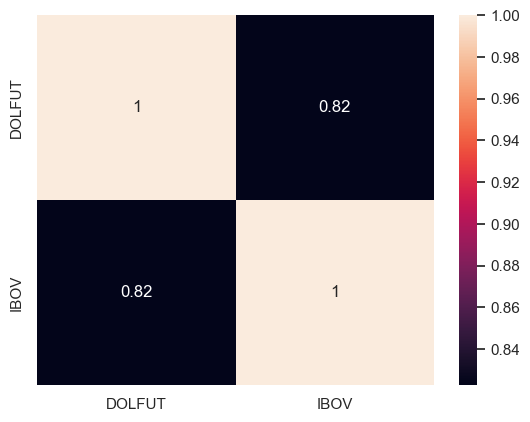

In [105]:
# Correlation
sns.heatmap(wallet_close_clean.corr(), annot=True)

<Axes: xlabel='Date'>

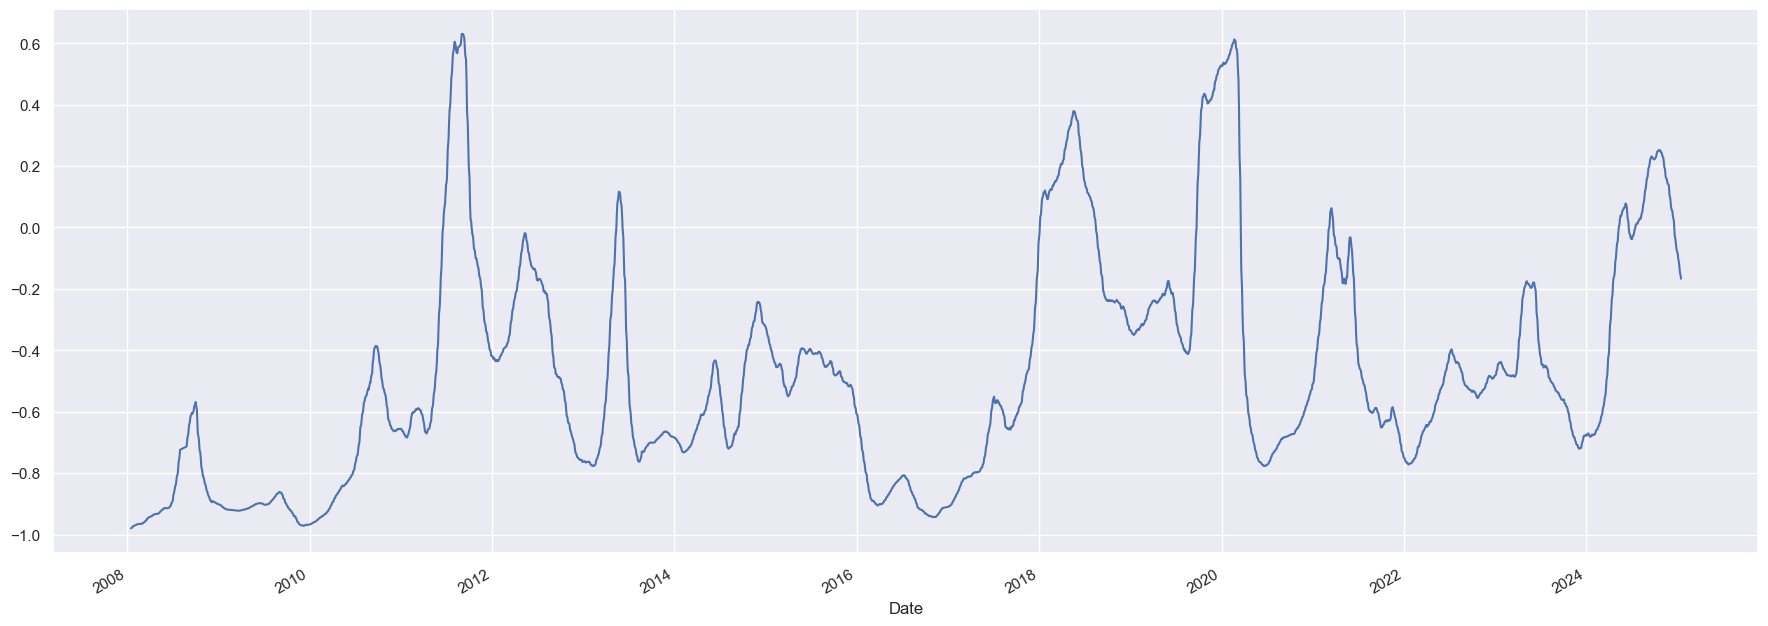

In [106]:
# Correlation
wallet_close_clean['DOLFUT'].rolling(252).corr(wallet_close_clean['IBOV']).plot(figsize=(22,8))